# 逻辑回归

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)


In [1]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
from src.plt_one_addpt_onclick import plt_one_addpt_onclick
from src.lab_utils_common import draw_vthresh
plt.style.use('seaborn-v0_8')


## Definition

虽然称呼中带着"回归"二字, 但**逻辑回归 (*Logisitc Regression*)**是一种用于[**分类 (*Classification*)**](super-unsuper-learning.md#分类算法)的线性模型.

逻辑回归通过**逻辑函数 (*Sigmoid*)**将线性组合映射到 0–1 概率，再按阈值做二分类或多分类.

## Sigmoid Function

逻辑函数的数学表达式如下:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

使用Python实现:


In [2]:
def sigmoid(z):
    """Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g


In [3]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])


Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


可视化后, 可以看出逻辑函数的基本特征, 其中最明显的就是"二分".


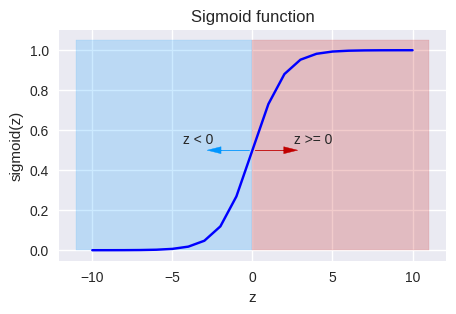

In [4]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)


## Mathematical Model of Logistic Regression

逻辑回归用逻辑函数把线性组合压缩到 $0–1$ 之间:

$$
P(y = 1 | \overrightarrow{x}) = \frac{1}{1 + e^{(-z)}}
$$

<mark>本质上是一个概率计算器, 把问题抽象成为一个**概率模型**</mark>.

其中,

$$
z = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b
$$

这里的 $P(y = 1 | \overrightarrow{x})$ 指的就是**概率**, 满足**概率守恒**:

$$
P(y = 0 | \overrightarrow{x}) + P(y = 1 | \overrightarrow{x}) = 1
$$

注意观察可以发现, $z$ 的表达式与先前学习的线性回归模型是相似的, 这二者确实存在一定联系, 这个表达式本身也揭示了线性回归中**特征加权**的思想.

因此逻辑回归还可以表示成如下形式, 即**线性组合 + 概率模型转换**的一步到位:

$$
\begin{align}
    f_{\overrightarrow{w}, b}(\overrightarrow{x^{(i)}}) & = g(\overrightarrow{w} \cdot \overrightarrow{x^{(i)}} + b) \\
    & = \frac{1}{1 + e^{-(\overrightarrow{w} \cdot \overrightarrow{x^{(i)}} + b)}} \\
    & = P(y = 1 | \overrightarrow{x}; \overrightarrow{w}, b)
\end{align}
$$
